In [3]:
import pandas as pd

# Load the dataset
Ames = pd.read_csv('Ames.csv')

# Simple querying: Select houses priced above $600,000
high_value_houses = Ames.query('SalePrice > 600000')
print(high_value_houses)

            PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
65    528164060       2470     615000          20       RL        106.0   
584   528150070       2364     611657          20       RL        100.0   
1007  528351010       4316     755000          60       RL        104.0   
1325  528320060       3627     625000          60       RL        118.0   
1639  528110020       2674     610000          20       RL        105.0   

      LotArea Street Alley LotShape  ... MiscFeature MiscVal MoSold YrSold  \
65      12720   Pave   NaN      Reg  ...         NaN       0      2   2008   
584     12919   Pave   NaN      IR1  ...         NaN       0      3   2010   
1007    21535   Pave   NaN      IR1  ...         NaN       0      1   2007   
1325    35760   Pave   NaN      IR1  ...         NaN       0      7   2006   
1639    13693   Pave   NaN      Reg  ...         NaN       0      3   2009   

     SaleType SaleCondition     GeoRefNo            Prop_Addr   Latitude  \
65  

In [4]:
# Advanced querying: Select houses with more than 3 bedrooms and priced below $300,000
specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')
print(specific_houses)

            PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  \
5     908128060       1922     198500          85       RL         64.0   
23    902326030       2640     265979          70       RM         65.0   
33    903400180       1848     207000          50       RL         64.0   
38    527327050       2030     195000          60       RL          NaN   
40    528326110       2172     291000          60       RL          NaN   
...         ...        ...        ...         ...      ...          ...   
2539  905101310       1768     136500          90       RL         72.0   
2557  905107250       1440     163000          60       RL         86.0   
2562  535101110       1584     119000          90       RL          NaN   
2575  905402060       1733     139600          20       RL          NaN   
2576  909275030       2002     145000          90       RH         82.0   

      LotArea Street Alley LotShape  ... MiscFeature MiscVal MoSold YrSold  \
5        7301   Pave 

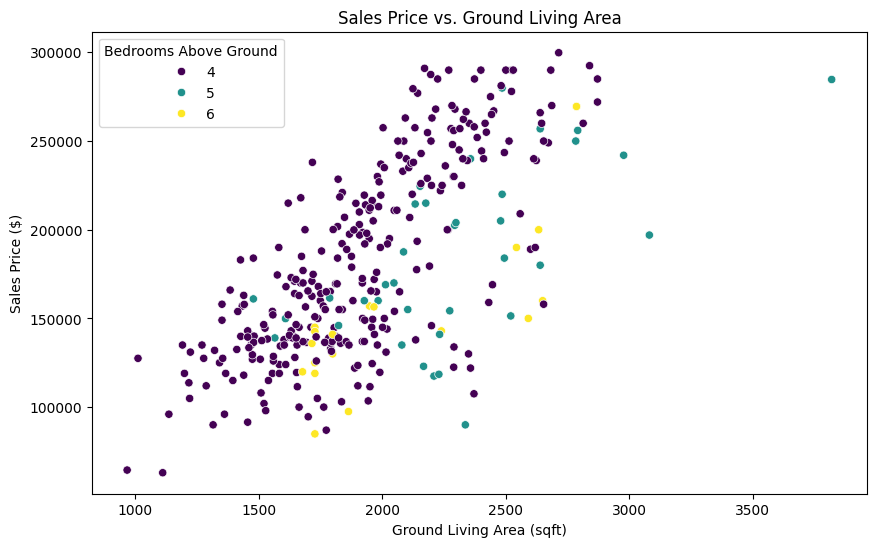

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')

# Visualizing the advanced query results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', hue='BedroomAbvGr', data=specific_houses, palette='viridis')
plt.title('Sales Price vs. Ground Living Area')
plt.xlabel('Ground Living Area (sqft)')
plt.ylabel('Sales Price ($)')
plt.legend(title='Bedrooms Above Ground')
plt.show()

In [11]:
# Advanced querying: Select houses with more than 3 bedrooms and priced below $300,000
specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')

# Group by neighborhood, then calculate the average and total price, and count the houses
grouped_data = specific_houses.groupby('Neighborhood').agg({
'SalePrice': ['mean', 'count']
})

# 'Neighborhood' is the index but you should rename the columns for clarity
grouped_data.columns = ['Average Sales Price', 'House Count']

# Round the average sale price to 2 decimal places
grouped_data['Averages Sales Price'] = grouped_data['Average Sales Price'].round(2)
print(grouped_data)

              Average Sales Price  House Count  Averages Sales Price
Neighborhood                                                        
BrDale              113700.000000            1             113700.00
BrkSide             154840.000000           10             154840.00
ClearCr             206756.307692           13             206756.31
CollgCr             233504.166667           12             233504.17
Crawfor             199946.684211           19             199946.68
Edwards             142372.413793           29             142372.41
Gilbert             222554.736842           19             222554.74
IDOTRR              146953.846154           13             146953.85
MeadowV             135966.666667            3             135966.67
Mitchel             152030.769231           13             152030.77
NAmes               158835.593220           59             158835.59
NPkVill             143000.000000            1             143000.00
NWAmes              203846.282051 

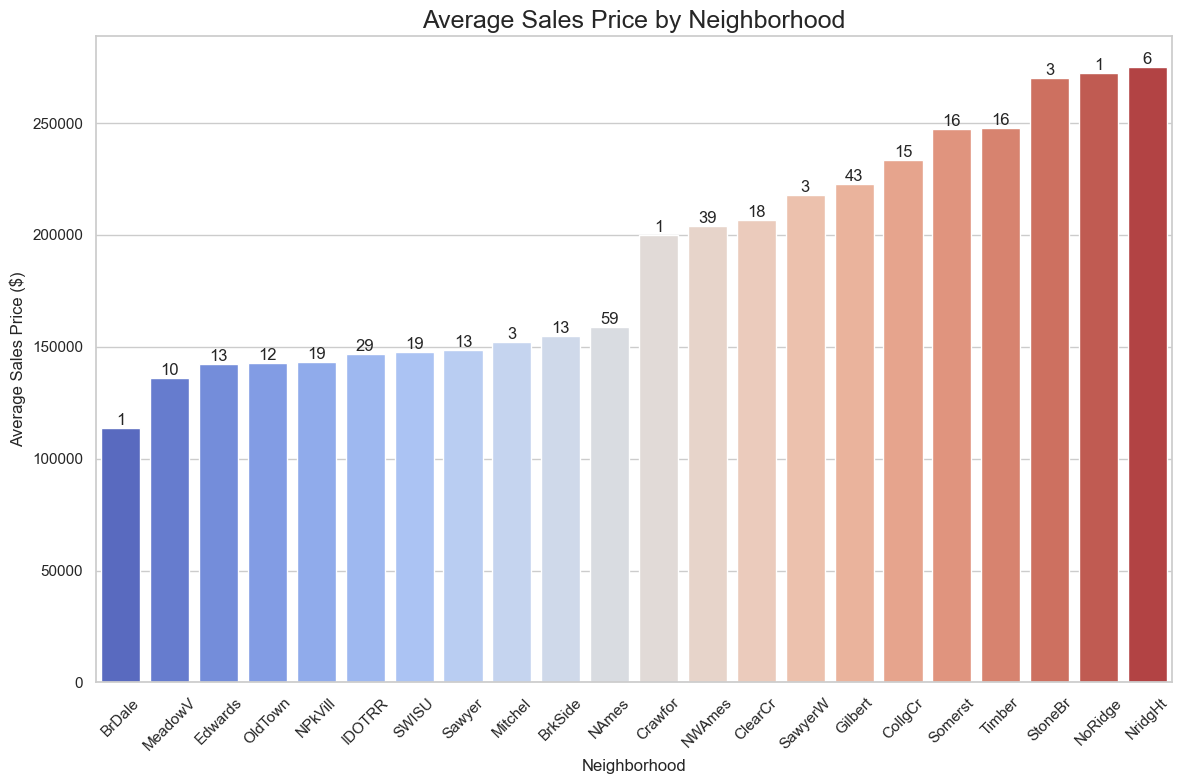

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Leer el archivo CSV
Ames = pd.read_csv('Ames.csv')

# Filtrar casas específicas
specific_houses = Ames.query('BedroomAbvGr > 3 & SalePrice < 300000')

# Agrupar por vecindario y calcular estadísticas
grouped_data = specific_houses.groupby('Neighborhood').agg({
    'SalePrice': ['mean', 'count']
})

# Renombrar las columnas
grouped_data.columns = ['Average Sales Price', 'House Count']
grouped_data['Average Sales Price'] = grouped_data['Average Sales Price'].round(2)

# Resetear índice y ordenar por precio promedio
grouped_data_reset = grouped_data.reset_index().sort_values(by='Average Sales Price')

# Estilo del gráfico
sns.set_theme(style="whitegrid")

# Crear gráfico de barras
plt.figure(figsize=(12, 8))
barplot = sns.barplot(
    x='Neighborhood',
    y='Average Sales Price',
    data=grouped_data_reset,
    palette="coolwarm",
    hue='Neighborhood',
    legend=False,
    errorbar=None  # Quita las barras de intervalo de confianza
)

# Rotar etiquetas del eje x
plt.xticks(rotation=45)

# Anotar con el número de casas por barra
for index, value in enumerate(grouped_data_reset['Average Sales Price']):
    house_count = grouped_data_reset.loc[index, 'House Count']
    plt.text(index, value, f'{house_count}', ha='center', va='bottom')

# Títulos y etiquetas
plt.title('Average Sales Price by Neighborhood', fontsize=18)
plt.xlabel('Neighborhood')
plt.ylabel('Average Sales Price ($)')
plt.tight_layout()  # Ajustar distribución del gráfico
plt.show()

In [15]:
# This is a list of neighborhoods with higher average sale prices
high_value_neighborhoods = ['NridgHt', 'NoRidge', 'StoneBr']

# Use df.loc[] to select houses in high-value neighborhoods based on your conditions
high_value_houses = Ames.loc[(Ames['BedroomAbvGr'] > 3) & (Ames['SalePrice'] < 300000) & (Ames['Neighborhood'].isin(high_value_neighborhoods)), 
['Neighborhood', 'SalePrice', 'GrLivArea']]

print(high_value_houses.head())

    Neighborhood  SalePrice  GrLivArea
40       NoRidge     291000       2172
162      NoRidge     285000       2225
460      NridgHt     250000       2088
468      NoRidge     268000       2295
490      NoRidge     260000       2417


In [17]:
# Definir vecindarios de alto valor
high_value_neighborhoods = ['NridgHt', 'NoRidge', 'StoneBr']

# Filtrar casas que NO estén en vecindarios de alto valor,
# que tengan al menos 3 recámaras arriba del nivel del suelo
# y que cuesten menos de $300,000
low_value_spacious = Ames.loc[
    (~Ames['Neighborhood'].isin(high_value_neighborhoods)) &
    (Ames['BedroomAbvGr'] >= 3) &
    (Ames['SalePrice'] < 300000)
]

# Ordenar por precio de venta para destacar las más baratas
low_value_spacious = low_value_spacious.sort_values(by='SalePrice').reset_index(drop=True)

# Seleccionar las primeras 5 observaciones
low_value_spacious_first_5 = low_value_spacious.iloc[:5, :]

# Mostrar solo columnas relevantes
print(low_value_spacious_first_5[['Neighborhood', 'SalePrice', 'GrLivArea']])

  Neighborhood  SalePrice  GrLivArea
0       IDOTRR      40000       1317
1       IDOTRR      50000       1484
2       IDOTRR      55000       1092
3       Sawyer      62383        864
4      Edwards      63000       1112


In [20]:
import pandas as pd


# Filtrar casas con precio menor a 300,000 y al menos 1 recámara arriba del nivel del suelo
affordable_houses = Ames.query('SalePrice < 300000 & BedroomAbvGr > 0')

# Crear tabla dinámica: vecindario como filas, recámaras como columnas, promedio de precio como valor
pivot_table = affordable_houses.pivot_table(
    values='SalePrice',
    index='Neighborhood',
    columns='BedroomAbvGr',
    aggfunc='mean'  # Se puede usar 'mean', 'sum', 'count', etc.
).round(2)

# Rellenar celdas vacías (donde no hay combinaciones) con 0
pivot_table = pivot_table.fillna(0)

# Mostrar todas las columnas en consola
pd.set_option('display.max_columns', None)

# Imprimir la tabla dinámica
print(pivot_table)


BedroomAbvGr          1          2          3          4          5          6
Neighborhood                                                                  
Blmngtn       178450.00  197931.19       0.00       0.00       0.00       0.00
Blueste       192500.00  128557.14  151000.00       0.00       0.00       0.00
BrDale             0.00   99700.00  111946.43  113700.00       0.00       0.00
BrkSide        77583.33  108007.89  140058.67  148211.11  214500.00       0.00
ClearCr       212250.00  220237.50  190136.36  209883.20  196333.33       0.00
CollgCr       154890.00  181650.00  196650.98  233504.17       0.00       0.00
Crawfor       289000.00  166345.00  193433.75  198763.94  210000.00       0.00
Edwards        59500.00  117286.27  134660.65  137332.00  191866.67  119900.00
Gilbert            0.00  172000.00  182178.30  223585.56  204000.00       0.00
Greens        193531.25       0.00       0.00       0.00       0.00       0.00
GrnHill            0.00  230000.00       0.00       

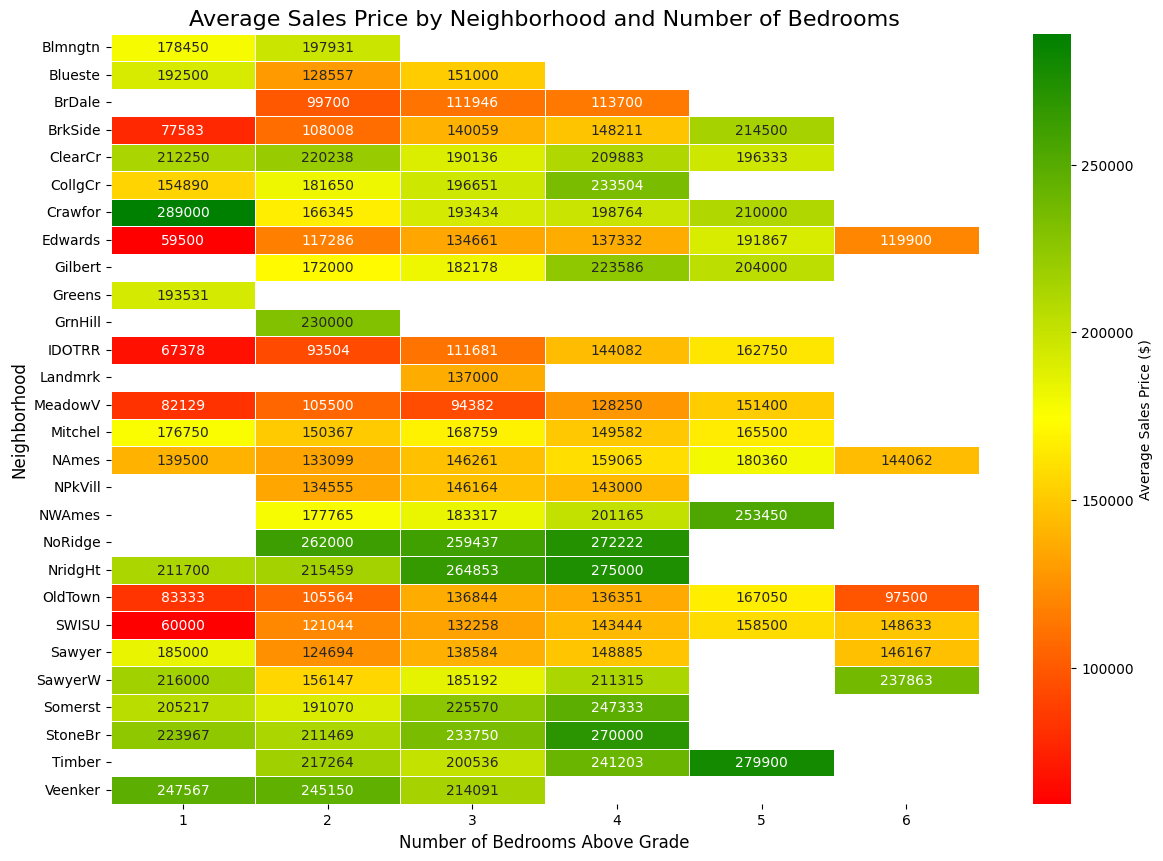

In [1]:
import pandas as pd
import matplotlib.colors
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
Ames = pd.read_csv('Ames.csv')

# Filtrar casas "asequibles"
affordable_houses = Ames.query('SalePrice < 300000 & BedroomAbvGr > 0')

# Crear tabla dinámica (pivot table)
pivot_table = affordable_houses.pivot_table(values='SalePrice', index='Neighborhood',columns='BedroomAbvGr', aggfunc='mean').round(2).fillna(0)

# Crear un mapa de colores personalizado
mask = pivot_table == 0  # enmascarar valores cero

# Tamaño de la figura
plt.figure(figsize=(14, 10))

# Paleta de colores
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])

# Crear el heatmap
sns.heatmap(pivot_table,
            cmap=cmap,
            annot=True,
            fmt=".0f",
            linewidths=.5,
            mask=mask,
            cbar_kws={'label': 'Average Sales Price ($)'})

# Etiquetas y título
plt.title('Average Sales Price by Neighborhood and Number of Bedrooms', fontsize=16)
plt.xlabel('Number of Bedrooms Above Grade', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)

# Mostrar gráfico
plt.show()